In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movie_df= pd.read_csv('tmdb_5000_movies.csv')

In [3]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [4]:
movies = movie_df[['budget','id','popularity','revenue','runtime','vote_average','vote_count']]

In [5]:
movies.head()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800
1,300000000,285,139.082615,961000000,169.0,6.9,4500
2,245000000,206647,107.376788,880674609,148.0,6.3,4466
3,250000000,49026,112.312950,1084939099,165.0,7.6,9106
4,260000000,49529,43.926995,284139100,132.0,6.1,2124


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 7 columns):
budget          4803 non-null int64
id              4803 non-null int64
popularity      4803 non-null float64
revenue         4803 non-null int64
runtime         4801 non-null float64
vote_average    4803 non-null float64
vote_count      4803 non-null int64
dtypes: float64(3), int64(4)
memory usage: 262.7 KB


In [7]:
movies.isnull().sum()

budget          0
id              0
popularity      0
revenue         0
runtime         2
vote_average    0
vote_count      0
dtype: int64

In [8]:
movies['runtime'] = movies['runtime'].fillna(movies['runtime'].mean())

/home/najet/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
movies.isnull().sum()

budget          0
id              0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
dtype: int64

In [10]:
movies.sample(10)

,budget,id,popularity,revenue,runtime,vote_average,vote_count
4793,0,182291,0.029757,0,90.0,6.0,2
4572,225000,15389,1.014966,0,98.0,7.0,38
1795,26000000,11509,10.981038,0,127.0,7.1,146
246,110000000,2024,23.657284,215294342,165.0,6.8,1099
4185,0,9783,6.833164,0,113.0,5.3,33
3360,7000000,2662,19.301432,16829545,89.0,6.0,306
2172,20000000,226857,27.256849,34077920,103.0,6.7,542
1426,35000000,14175,14.051852,19478106,76.0,5.2,235
1525,31500000,28,49.973462,89460381,153.0,8.0,2055
4134,0,18238,6.632891,0,86.0,5.3,124


In [11]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.607225,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,117.500000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [12]:
movies['budget'].value_counts()

0            1037
20000000      144
30000000      128
25000000      126
40000000      123
15000000      120
35000000      102
10000000      101
50000000      101
60000000       86
5000000        84
12000000       79
8000000        62
70000000       60
80000000       59
18000000       59
6000000        55
7000000        55
2000000        54
45000000       52
3000000        51
4000000        49
1000000        48
75000000       47
55000000       45
28000000       42
100000000      41
150000000      41
11000000       41
13000000       41
             ... 
41677699        1
123000000       1
1650000         1
3700000         1
10200000        1
1488423         1
20500000        1
12899867        1
180000          1
237000000       1
56000           1
325000          1
2280000         1
15300000        1
3100000         1
2540800         1
19500000        1
12516654        1
2627000         1
10284523        1
14200000        1
22000           1
97250400        1
78146652        1
3730500   

In [13]:
movies['revenue'].value_counts()

0            1427
7000000         6
8000000         6
6000000         5
12000000        5
10000000        5
100000000       5
14000000        4
25000000        4
11000000        4
5000000         4
32000000        3
13000000        3
60000000        3
7800000         3
14400000        3
4000000         3
17000000        3
30000000        3
77000000        2
20000000        2
29000000        2
42000000        2
2200000         2
8500000         2
24000000        2
102000000       2
9000000         2
15000000        2
33400000        2
             ... 
157887643       1
18195610        1
482860185       1
10501938        1
325233863       1
16633035        1
53191886        1
273552592       1
47042000        1
275293450       1
786636033       1
538400000       1
32204030        1
30411183        1
91636986        1
82087155        1
82150642        1
48190704        1
104303851       1
2401510         1
15200000        1
109906372       1
83719388        1
193355800       1
136621271 

In [14]:
movies[['budget','revenue']]=movies[['budget','revenue']].replace(0,np.nan)

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [15]:
movies.dropna(subset=['budget','revenue'], axis=0, inplace=True)

/home/najet/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,3.229000e+03,3229.000000,3229.000000,3.229000e+03,3229.000000,3229.000000,3229.000000
mean,4.065444e+07,44780.705791,29.033689,1.212430e+08,110.724373,6.309353,977.287395
std,4.439674e+07,74609.434723,36.165730,1.863029e+08,20.965694,0.873891,1414.309577
min,1.000000e+00,5.000000,0.019984,5.000000e+00,41.000000,0.000000,0.000000
25%,1.050000e+07,4958.000000,10.446722,1.700000e+07,96.000000,5.800000,178.000000
50%,2.500000e+07,11451.000000,20.410354,5.518472e+07,107.000000,6.300000,471.000000
75%,5.500000e+07,45272.000000,37.335721,1.462920e+08,121.000000,6.900000,1148.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


In [17]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 4798
Data columns (total 7 columns):
budget          3229 non-null float64
id              3229 non-null int64
popularity      3229 non-null float64
revenue         3229 non-null float64
runtime         3229 non-null float64
vote_average    3229 non-null float64
vote_count      3229 non-null int64
dtypes: float64(5), int64(2)
memory usage: 201.8 KB


In [18]:
movies['budget'].value_counts()

20000000.0     126
25000000.0     115
30000000.0     114
40000000.0     111
15000000.0     107
50000000.0      99
35000000.0      87
60000000.0      77
10000000.0      73
5000000.0       66
12000000.0      64
70000000.0      59
80000000.0      57
8000000.0       49
18000000.0      49
45000000.0      47
6000000.0       45
75000000.0      45
2000000.0       44
28000000.0      42
55000000.0      41
7000000.0       40
150000000.0     40
3000000.0       40
100000000.0     40
4000000.0       37
14000000.0      36
13000000.0      35
17000000.0      34
90000000.0      34
              ... 
17900000.0       1
2380000.0        1
12600000.0       1
270000000.0      1
450000.0         1
14200000.0       1
2053648.0        1
22500000.0       1
12806000.0       1
133000000.0      1
609000.0         1
35866397.0       1
12300000.0       1
31115000.0       1
31192.0          1
4600000.0        1
7200000.0        1
3730500.0        1
312000.0         1
1488423.0        1
3400000.0        1
777000.0    

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


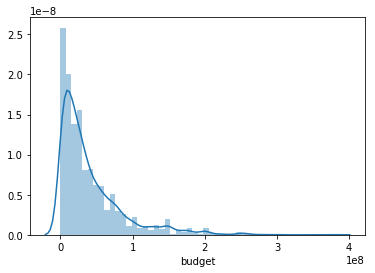

In [19]:
sns.distplot(movies['budget'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fd550c17c88>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd550c1f6d8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd550c25390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd550c1ff28>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd550c17dd8>,
  <matplotlib.lines.Line2D at 0x7fd550c1f2b0>]}

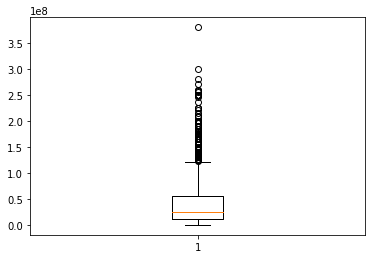

In [20]:
plt.boxplot(movies['budget'])

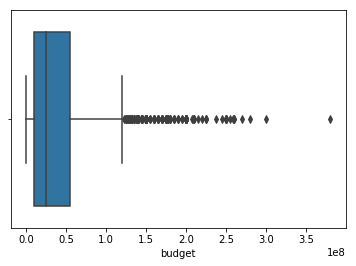

In [22]:
sns.boxplot(movies['budget'])

In [32]:
movies['budget'].sort_values()

4238            1.0
3611            4.0
3372            7.0
3419            7.0
4608            8.0
3131           10.0
3137           10.0
2933           11.0
1912           25.0
1771           28.0
1562           30.0
4582          218.0
4641          250.0
4796         7000.0
4696         8000.0
4724        10000.0
4788        12000.0
4577        15000.0
4792        20000.0
4773        27000.0
4772        31192.0
4496        60000.0
4738        60000.0
4752        65000.0
4742        65000.0
3159        85000.0
4722       100000.0
4138       100000.0
4700       100000.0
4723       100000.0
           ...     
45      200000000.0
60      200000000.0
59      200000000.0
24      207000000.0
27      209000000.0
33      210000000.0
36      210000000.0
20      215000000.0
16      220000000.0
14      225000000.0
15      225000000.0
18      225000000.0
0       237000000.0
2       245000000.0
3       250000000.0
9       250000000.0
26      250000000.0
19      250000000.0
98      250000000.0


### Standardizing Data

In [33]:
from sklearn.preprocessing import StandardScaler

In [37]:
movie_scale = movies[[i for i in movies.columns if i!='id']]
scaler = StandardScaler()

scaler.fit_transform(movie_scale)

array([[ 4.42320670e+00,  3.35739643e+00,  1.43161254e+01,
         2.44607069e+00,  1.01933200e+00,  7.65347915e+00],
       [ 5.84244953e+00,  3.04337758e+00,  4.50818140e+00,
         2.78000117e+00,  6.75986642e-01,  2.49115064e+00],
       [ 4.60342801e+00,  2.16656028e+00,  4.07695973e+00,
         1.77820973e+00, -1.07040670e-02,  2.46710692e+00],
       ...,
       [-9.15399119e-01, -7.97044872e-01, -6.50353504e-01,
         1.31486142e-02,  1.24822890e+00, -6.46555052e-01],
       [-9.15691979e-01, -1.58344001e-01, -6.48604682e-01,
        -1.60879943e+00,  6.75986642e-01, -2.25789921e-01],
       [-9.10893586e-01, -4.08292140e-01, -6.39928432e-01,
        -1.41798202e+00,  3.32641287e-01, -5.22800602e-01]])

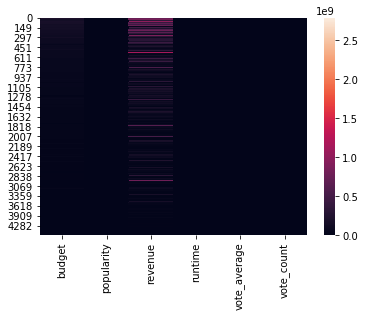

In [38]:
sns.heatmap(movie_scale)